# Trabajo completo - Simulación red de Ising 2D
## Física computacional - UBA

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm
import time
import os
from IPython.display import Image
from IPython.display import HTML
from IPython.display import Video

# **Funciones** **`H(S)`** **y** **`metropolis1(S,prob)`**
****

Partiendo del Hamiltoniano del modelo de Ising 2D para campo magnético externo nulo, si tenemos una red que es cuadrada de dimensión $L \times L$, entonces

$$H(S)=-\sum S_{ij}(S_{i-1,j}+S_{i+1,j}+S_{i,j-1}+S_{i,j+1}) = - \sum_{i,j}^{L}S_{ij} (S_{i+1,j}+S_{i,j+1}) \Rightarrow h(s) = \frac{H(s)}{L^2}.$$

Hay que recordar que hay condiciones de contorno periódicas, es decir, los espines que están en las puntas opuestas se ven. Definimos la función **`h(S)`** que es la energía por partícula, es decir, el hamiltoniano del sistema dividido $L^2$.

In [16]:
def H(S):
    H = 0
    L_x = S.shape[0]
    L_y = S.shape[1]
    for i in tqdm(range(L_x)):
        for j in range( L_y):
                H -= S[i,j]*(+S[(i+1)%L_x,j]+S[i,(j+1)% L_y]) #La linea con % L_x/L_y asegura que la última partícula vea a la primera ya que (L+1)%L = 1.
    h = H/(L_x* L_y)
    return (H,h)

"""
def H_especifico(S,posicion): #Esta función calcula la energía de una cruz
     L_x = S.shape[0]
     L_y = S.shape[1]
     H_especifico = -S[posicion[0],posicion[1]]*(S[(posicion[0]+1)%L_x,posicion[1]]+ S[(posicion[0]-1)%L_x,posicion[1]] +S[posicion[0],(posicion[1]+1)%L_y]+S[posicion[0],(posicion[1]-1)%L_y])
     return H_especifico
"""

'\ndef H_especifico(S,posicion): #Esta función calcula la energía de una cruz\n     L_x = S.shape[0]\n     L_y = S.shape[1]\n     H_especifico = -S[posicion[0],posicion[1]]*(S[(posicion[0]+1)%L_x,posicion[1]]+ S[(posicion[0]-1)%L_x,posicion[1]] +S[posicion[0],(posicion[1]+1)%L_y]+S[posicion[0],(posicion[1]-1)%L_y])\n     return H_especifico\n'

  0%|          | 0/6 [00:00<?, ?it/s]

La energía por partícula para el fundamental es -2.0


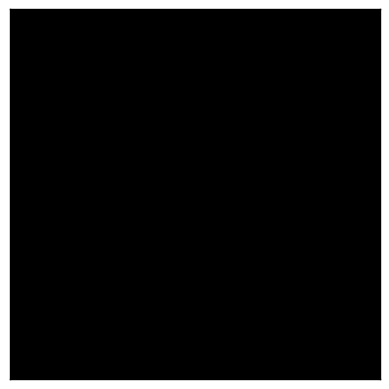

In [5]:
S = np.ones((6,6))
plt.imshow(S, cmap='gray', interpolation='nearest')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
print("La energía por partícula para el fundamental es " + str(H(S)[1]))

Para una red de Ising 2D, si hacemos la sumatoria sobre primeros vecinos, la energía del fundamental ($S_{ij} = 1$) es $H_0 = -2 J L^{2}$ y como usamos unidades en las que $J = 1$, la energía por partícula de la red tiene que ser $h_0 = -2$. Ahora definamos la función **`metropolis1(S, prob)`**. Lo que tiene que hacer esta función es:

* Recibe una matriz **`S`** y un vector con probabilidades **`g`**.

* Aplicar el método Metrópolis.

* Devolver un estado nuevo **`S'`**, el incremento en la magnetización **`dM`** y el incremento en la energía **`dE`**.

El método Metrópolis hace lo siguiente:

* Elegimos un espín de la red al azar.

* Calculamos la diferencia de energía  $ΔE$  que resultaría de dar vuelta a ese espín.

* Si  $ΔE≤0$ , damos vuelta el espín; si  $ΔE>0$ , damos vuelta al espín con probabilidad  $e^{−βΔE}$.

dM = -2.0 dE = 8.0


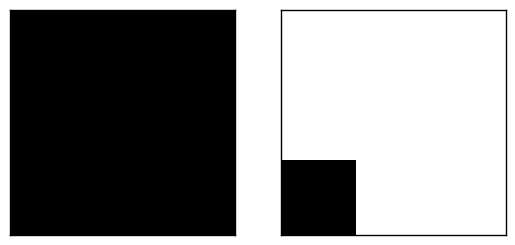

In [17]:
T = 10000      #Temperatura

g = np.array([0,0,0,0,np.exp(-4/T),0,0,0,np.exp(-8/T)]) #Vector de probabilidades, sólo me importan para los únicos casos posibles positivos DeltaE = 4 y DeltaE = 8.

def metropolis1(S, probabilidades):
    S = S.copy() #Me armo una copia de la matriz de entrada
    L_x, L_y = S.shape #Veo el tamaño de la red
    idx = np.random.randint(L_x * L_y) #Agarro una posición random de la red
    i, j = divmod(idx, L_x)

    spin_original = S[i, j] #Veo el spin de esa posición random
    DeltaE = 2 * spin_original*(S[(i+1)%L_x,j]+ S[(i-1)%L_x,j] +S[i,(j+1)%L_y]+S[i,(j-1)%L_y]) #Calculo cuánto cambiaría la energía si ese spin se flipea
    if DeltaE <= 0 or np.random.random() < probabilidades[int(DeltaE)]:  # Si la energía luego del spin es menor o con cierta probabilidad definidad por el factor de Boltzmann me quedo con ese estado
        S[i, j] *= -1
        DeltaM = -2 * spin_original
        return S, DeltaM, DeltaE
    else:
        return S, 0, 0

S = np.ones((3,3))
S_prima = metropolis1(S,g)

fig,ax = plt.subplots(1,2)
ax[0].imshow(S, cmap='gray', interpolation='nearest')
ax[0].set_xticks([])  # Remove x-axis ticks
ax[0].set_yticks([])  # Remove y-axis ticks
ax[0].spines['top'].set_linewidth(1)
ax[0].spines['bottom'].set_linewidth(1)
ax[0].spines['left'].set_linewidth(1)
ax[0].spines['right'].set_linewidth(1)

ax[1].imshow(S_prima[0], cmap='gray', interpolation='nearest')
ax[1].set_xticks([])  # Remove x-axis ticks
ax[1].set_yticks([])  # Remove y-axis ticks
ax[1].spines['top'].set_linewidth(1)
ax[1].spines['bottom'].set_linewidth(1)
ax[1].spines['left'].set_linewidth(1)
ax[1].spines['right'].set_linewidth(1)
print("dM = " + str(S_prima[1]),"dE = " + str(S_prima[2]))

Luego, hacemos un paso metrópolis por cada posición de la red posible, es decir, se hacen $L^2$ pasos.

  0%|          | 0/16384 [00:00<?, ?it/s]

dM = 148 dE = -3012


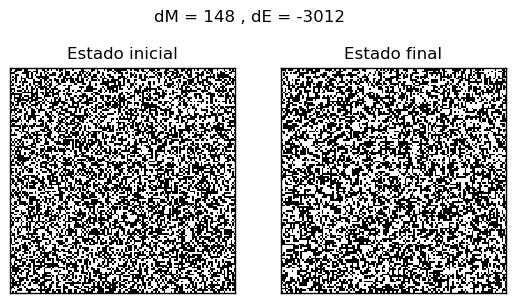

In [18]:
T = 10#Temperatura
g = [0,0,0,0,np.exp(-4/T),0,0,0,np.exp(-8/T)]  #Vector de probabilidades, sólo me importan para los únicos casos posibles positivos DeltaE = 4 y DeltaE = 8.

def metropolis(S, probabilidades):
    S = S.copy()  # Me armo una copia de la matriz de entrada
    dE = 0 #Me defino el diferencial dE
    dM = 0 #Me defino el diferencial dM
    L_x, L_y = S.shape #Veo qué longitud tiene l ared
    for _ in tqdm(range(L_x * L_y)): #Loop para hacer un flipeo de spin por cada posición de la red
        idx = np.random.randint(L_x * L_y) #Agarro una posición cualquiera de la red
        i, j = divmod(idx, L_x)

        spin_original = S[i, j] #Agarro el espín de esa red
        DeltaE = 2 * spin_original*(S[(i+1)%L_x,j]+ S[(i-1)%L_x,j] +S[i,(j+1)%L_y]+S[i,(j-1)%L_y]) #Veo cómo cambia la energía si el espín ese se flipea

        if DeltaE <= 0 or np.random.random() < probabilidades[DeltaE]: #Si la energía después del flip es menor o con cierta probabilidad definido por el factor de Boltzmann me quedo con el flip
            S[i, j] *= -1 #Flipeo el spin
            dM += -2 * spin_original # Sumo lo que cambia en la magnetización el flip de un spin que es siempre -2 * signo(spin)
            dE += DeltaE #Sumo el DeltaE
    return S, dM, dE

L = 128
#S = np.matrix([[-1,1,-1],[1,1,1],[-1,1,-1]])
S = 2 * np.random.randint(2, size=(L, L)) - 1
S_prima = metropolis(S,g)


fig,ax = plt.subplots(1,2)


plt.suptitle("dM = %i , dE = %i"%(S_prima[1],S_prima[2]),y=0.85)

ax[0].set_title("Estado inicial")
ax[0].imshow(S, cmap='gray', interpolation='nearest')
ax[0].set_xticks([])  # Remove x-axis ticks
ax[0].set_yticks([])  # Remove y-axis ticks
ax[0].spines['top'].set_linewidth(1)
ax[0].spines['bottom'].set_linewidth(1)
ax[0].spines['left'].set_linewidth(1)
ax[0].spines['right'].set_linewidth(1)

ax[1].set_title("Estado final")
ax[1].imshow(S_prima[0], cmap='gray', interpolation='nearest')
ax[1].set_xticks([])  # Remove x-axis ticks
ax[1].set_yticks([])  # Remove y-axis ticks
ax[1].spines['top'].set_linewidth(1)
ax[1].spines['bottom'].set_linewidth(1)
ax[1].spines['left'].set_linewidth(1)
ax[1].spines['right'].set_linewidth(1)

#plt.savefig("Figuras metropolis primero/metropolis_T="+str(T)+"_L="+str(S.shape[0])+".png",bbox_inches ="tight")
print("dM = " + str(S_prima[1]),"dE = " + str(S_prima[2]))

In [22]:
@njit                                                                             #Para que numba compile la función.
def H(S):
    H = 0
    L_x = S.shape[0]
    L_y = S.shape[1]
    for i in range(L_x):
        for j in range( L_y):
                H -= S[i,j]*(S[(i+1)%L_x,j]+S[i,(j+1)% L_y]) #La linea con % L_x/L_y asegura que la última partícula vea a la primera ya que (L+1)%L = 1.
    h = H/(L_x* L_y)
    return (H,h)

@njit
def metropolis1(S, probabilidades):
    S = S.copy()
    L_x, L_y = S.shape
    idx = np.random.randint(L_x * L_y)
    i, j = divmod(idx, L_x)

    spin_original = S[i, j]
    DeltaE = 2 * spin_original*(S[(i+1)%L_x,j]+ S[(i-1)%L_x,j] +S[i,(j+1)%L_y]+S[i,(j-1)%L_y])
    if DeltaE <= 0 or np.random.random() < probabilidades[DeltaE]:  # Default 0 si no está
        S[i, j] *= -1
        DeltaM = -2 * spin_original
        return S, DeltaM, DeltaE
    else:
        return S, 0, 0


@njit
def metropolis(S, probabilidades):
    S = S.copy()  # Si querés preservar la original
    dE = 0
    dM = 0
    L_x, L_y = S.shape
    for _ in range(L_x * L_y):
        idx = np.random.randint(L_x * L_y)
        i, j = divmod(idx, L_x)

        spin_original = S[i, j]
        DeltaE = 2 * spin_original*(S[(i+1)%L_x,j]+ S[(i-1)%L_x,j] +S[i,(j+1)%L_y]+S[i,(j-1)%L_y])

        if DeltaE <= 0 or np.random.random() < probabilidades[DeltaE]:
            S[i, j] *= -1
            dM += -2 * spin_original
            dE += DeltaE
        # Si no, no hacemos nada
    return S, dM, dE


@njit
def metropolisN(S, prob, npasos):
  M = np.zeros(npasos)
  E = np.zeros(npasos)
  M[0] = np.sum(S)
  E[0] = H(S)[0]
  for i in range(1,npasos):
   S,dM,dE = metropolis(S,prob)
   E[i] = E[i-1] + dE
   M[i] = M[i-1] + dM
  return S, np.mean(np.abs(M)), np.mean(E), np.var(np.abs(M)), np.var(E)

# **Termalización**

In [ ]:
L = 32                                                                  #Elijan el lado de la red.
T = 30

nequilibrio = 1000                                                          #Numero de pasos tentativo para llegar al equilibrio. Experimenten con este valor. Obviamente, no es 1.

g = np.array([0,0,0,0,np.exp(-4/T),0,0,0,np.exp(-8/T)])

                                                                                #Estado inicial.
                                                                                #Descomenten el que sea adecuado para la elección de beta.

S = np.ones((L, L), dtype = int)                                               #Opcion 1: todos los espines apuntan para arriba.
#S = 2 * np.random.randint(2, size = (L, L)) - 1                                #Opcion 2: matriz aleatoria de 1's y -1's.
#S = np.random.choice([-1, 1], size = (L, L))                                   #Variante de la opción 2.


M = np.zeros(nequilibrio)                                                       #Aquí se va a guardar la magnetización en función del paso.
E = np.zeros(nequilibrio)                                                       #Aquí se va a guardar la energia en funcion del paso.
M[0] = np.sum(S)                                                                #Estos son sus valores iniciales.
E[0] = H(S)[0]

for n in tqdm(range(1, nequilibrio)):                                                 #Genera un loop para dar nequilibrio pasos de Montecarlo.
  S, dM, dE = metropolis(S, g)                                               #Aplica un paso de Montecarlo.
  M[n] = M[n - 1] + dM                                                      #Noten que no tienen que calcular la magnetización de toda la red.
  E[n] = E[n - 1] + dE                                                       #Para actualizar su valor, sólo necesitan el valor previo y el incremento. Ídem para la energía.

m = np.abs(M / (L * L))                                                                 #Recién al final calculen las cantidades por espín.
e = E / (L * L)

plt.figure(figsize=(12, 6))                                                     #Grafica el estado final y la evolución de la magnetización y de la energía por espín.
plt.subplot(2, 2, 1)
plt.plot(m)
#plt.xticks([])
#plt.yticks([])
plt.ylabel('magnetizacion')
plt.subplot(2, 2, 3)
plt.plot(e)
#plt.xticks([])
#plt.yticks([])
plt.ylabel('energia')
plt.xlabel('paso')
plt.subplot(1, 2, 2)
plt.imshow(S)

#plt.savefig("Figuras termalización/termalización_T="+str(T)+"_L="+str(S.shape[0]) +"_neq =" + str(nequilibrio) + ".png",bbox_inches ="tight")


# **Función de termalización**
****

In [20]:


@njit
def metropolisTermo(S,prob,nequilibrio):
  for _ in range(nequilibrio):
    S = metropolis(S,prob)[0]
  return S

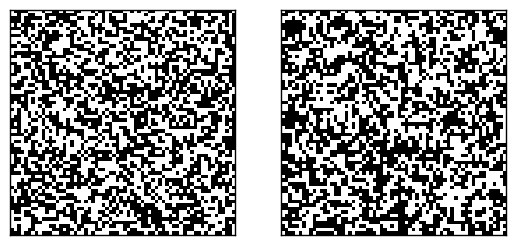

In [21]:
T=10
L=64
g = np.array([0,0,0,0,np.exp(-4/T),0,0,0,np.exp(-8/T)])
S = 2 * np.random.randint(2, size = (L, L)) - 1

S_test = metropolisTermo(S,g,100)

fig,ax = plt.subplots(1,2)

ax[0].imshow(S, cmap='gray', interpolation='nearest')
ax[0].set_xticks([])  # Remove x-axis ticks
ax[0].set_yticks([])  # Remove y-axis ticks
ax[0].spines['top'].set_linewidth(1)
ax[0].spines['bottom'].set_linewidth(1)
ax[0].spines['left'].set_linewidth(1)
ax[0].spines['right'].set_linewidth(1)

ax[1].imshow(S_test, cmap='gray', interpolation='nearest')
ax[1].set_xticks([])  # Remove x-axis ticks
ax[1].set_yticks([])  # Remove y-axis ticks
ax[1].spines['top'].set_linewidth(1)
ax[1].spines['bottom'].set_linewidth(1)
ax[1].spines['left'].set_linewidth(1)
ax[1].spines['right'].set_linewidth(1)

# **Promedios**
****

In [ ]:
L = 64 #completen                                                                  #Lado de la red
L2 = L  * L
T = 30

nequilibrio = 5000                                                                #Este valor lo decidimos en base a lo anterior.
npromedio = 10000                                                                  #Número de pasos tentativo para calcular promedios.

g = np.array([0,0,0,0,np.exp(-4/T),0,0,0,np.exp(-8/T)])

#S = np.ones((L, L), dtype = int)                                               #Estado inicial.
S_0 = 2 * np.random.randint(2, size = (L, L)) - 1

S = metropolisTermo(S_0, g, nequilibrio)                                       #Termalizamos.

m = np.zeros(npromedio)                                                         #Aquí se van a guardar la magnetizacion y la energia en funcion del paso.
e = np.zeros(npromedio)

m[0] = np.sum(S)                                                                #Estos son sus valores iniciales.
e[0] = H(S)[0]

mmedia = [abs(m[0])]                                                            #Aquí se van a ir actualizando los valores medios del valor absoluto de la magnetización y de la energía.
emedia = [e[0]]
print("Pasos Metrópolis")
for n in tqdm(range(1, npromedio)):                                             #Este loop genera las series temporales y calcula la evolución de los valores medios sobre la marcha.
  S, dm, de = metropolis(S, g)
  m[n] = m[n - 1] + dm
  e[n] = e[n - 1] + de
  mmedia.append((n * mmedia[n - 1] + abs(m[n])) / (n + 1))                      #Esta es una forma eficiente de ir actualizando el valor medio en función del número de pasos,
  emedia.append((n * emedia[n - 1] + e[n]) / (n + 1))                           #sin tener que calcular el valor medio de toda la cadena cada vez.
                                                                                #La lógica es que <s>_{N + 1} = N * <s>_N / (N + 1) + s_{N + 1} / (N + 1).

m = m / L2                                                                      #Recién al final de todo dividan por el número de espines.
e = e / L2
mmedia = np.array(mmedia) / L2
emedia = np.array(emedia) / L2

fig = plt.figure(figsize = (12, 6))                                             #Gráficos
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)
fig.suptitle('Series temporales y valores medios')
plt.subplot(2, 2, 1)
plt.plot(m)
plt.ylabel('m', rotation = 0, labelpad = 10)
plt.xlabel('número de pasos Montecarlo')
plt.subplot(2, 2, 2)
plt.plot(mmedia)
plt.ylabel('|m| media', rotation = 0, labelpad = 30)
plt.xlabel('número de pasos Montecarlo')
plt.subplot(2, 2, 3)
plt.plot(e, color = 'red')
plt.ylabel('e', rotation = 0, labelpad = 10)
plt.xlabel('número de pasos Montecarlo')
plt.subplot(2, 2, 4)
plt.plot(emedia, color = 'red')
plt.ylabel('e media', rotation = 0, labelpad = 30)
plt.xlabel('número de pasos Montecarlo')


#plt.savefig("Figuras promedios/promedios_T="+str(T)+"_L="+str(S.shape[0]) + ".png",bbox_inches ="tight")

Red $16 \times 16$

El órden de las figuras es: $T \gg T_c$, $T \sim T_c$ y $T \ll T_c$.

A temperaturas mucho mayores a la crítica se puede observar que se llega al equilibrio luego de pocos pasos montecarlo. También se puede observar que la magnetización y la energía varían alrededor de un valor. Para la magnetización la variación es alrededor del 0, por lo que la muestra total no está magnetizada.

A temperaturas similares a la crítica se puede observar que no se llega a un equilibrio con la misma rapidez que en el caso anterior. Si bien pareciera que las oscilaciones se estabilizan esto es más debido al a escala en el eje y. A su vez, la magnetización de la muestra va variando entre +1 y -1 por lo que podemos decir que sí hay magnetización.

A temperaturas mucho menores que la crítica también se puede observar que se llega a la estabilidad con pocos pasos. Como era de esperarse para una red de Ising, el valor medio de la magnetización oscila alrededor de 1, lo que significa que toda la muestra tiene espín +1.

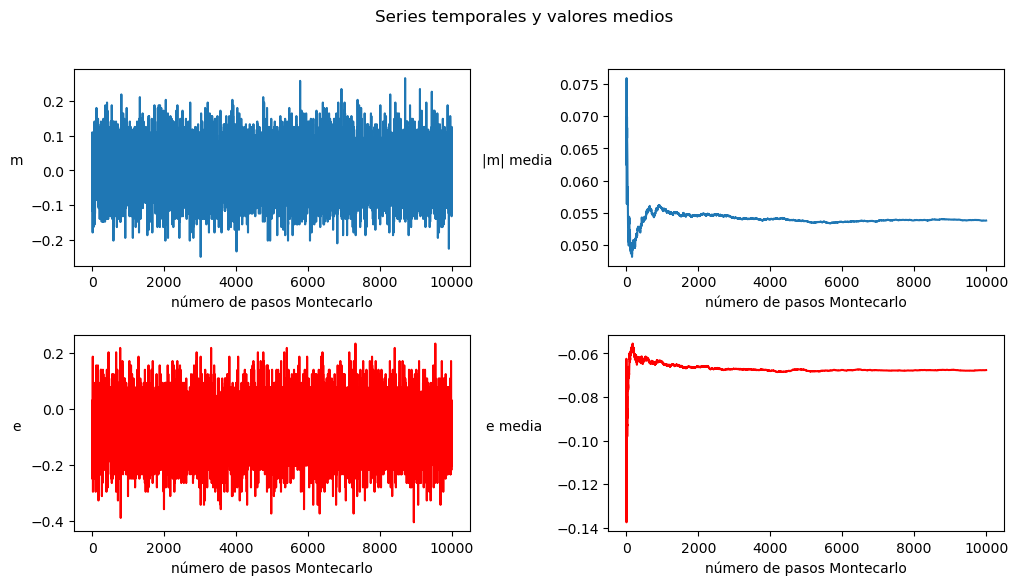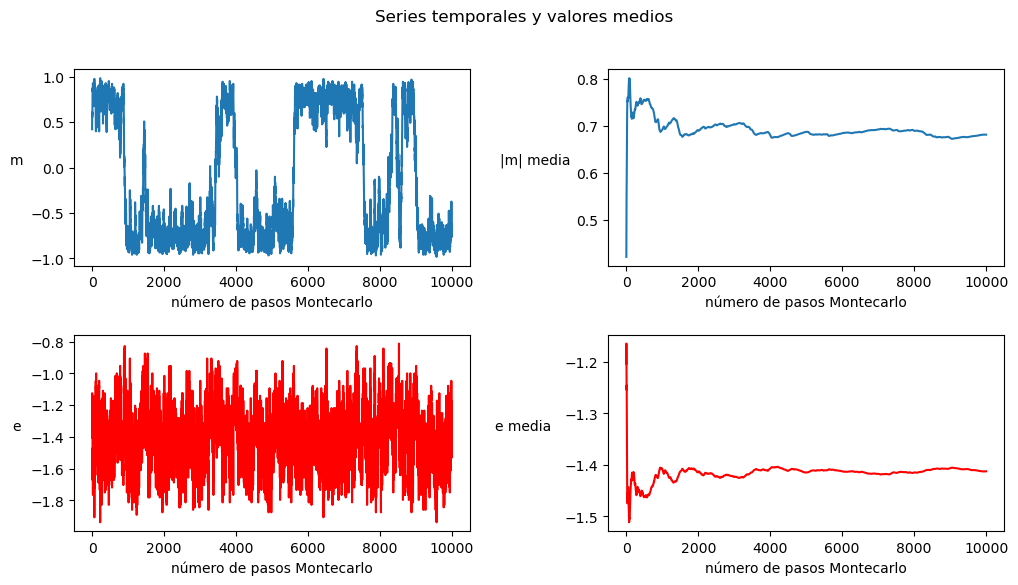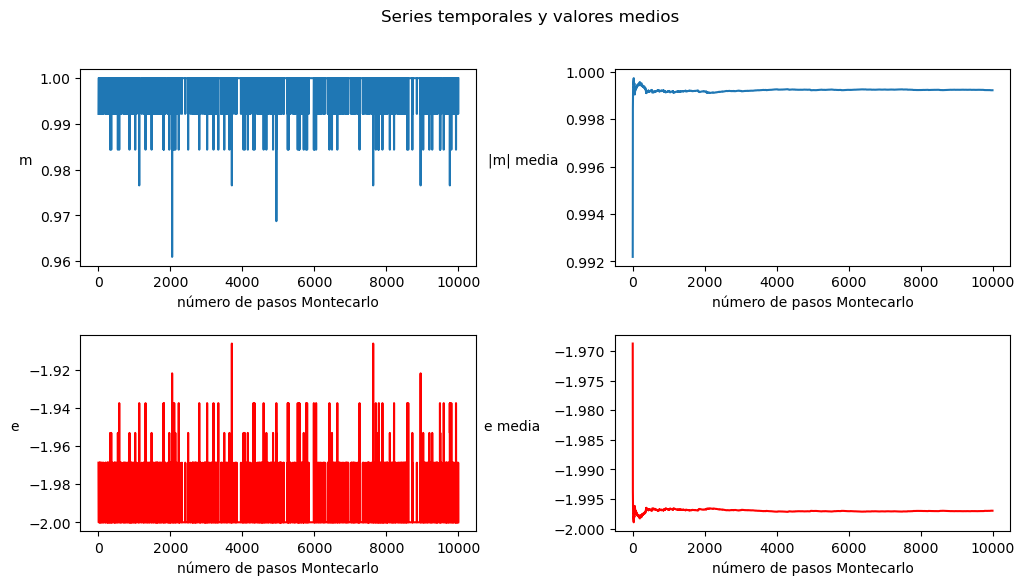

Red $128 \times 128$

Las conclusiones con las mismas salvo para el caso de temperatura similar a la crítica. Se puede observar que para llegar a un equilibrio se requieren más pasos de los que se tomaron y esto es debido al aumento en el tamaño de la red.

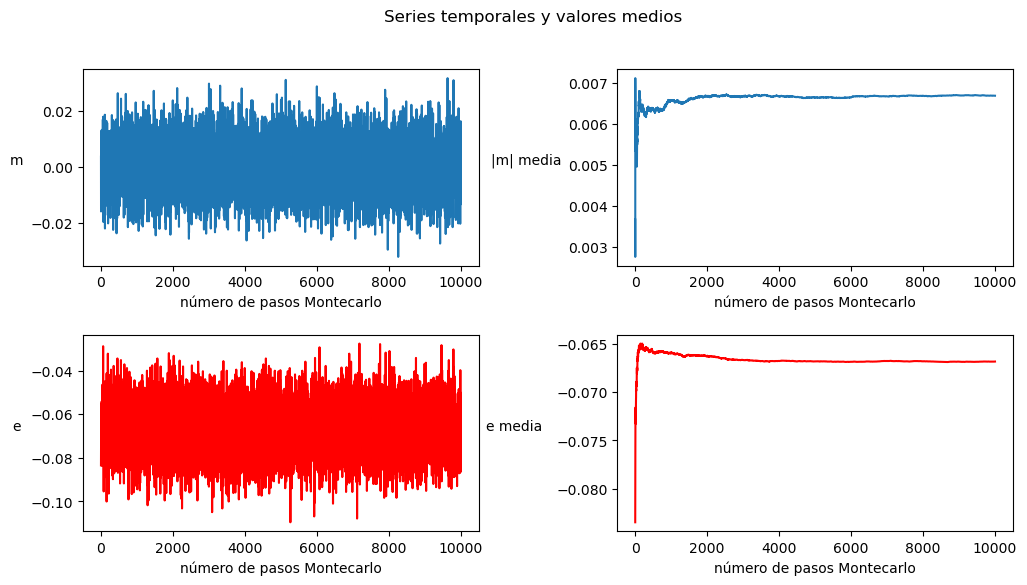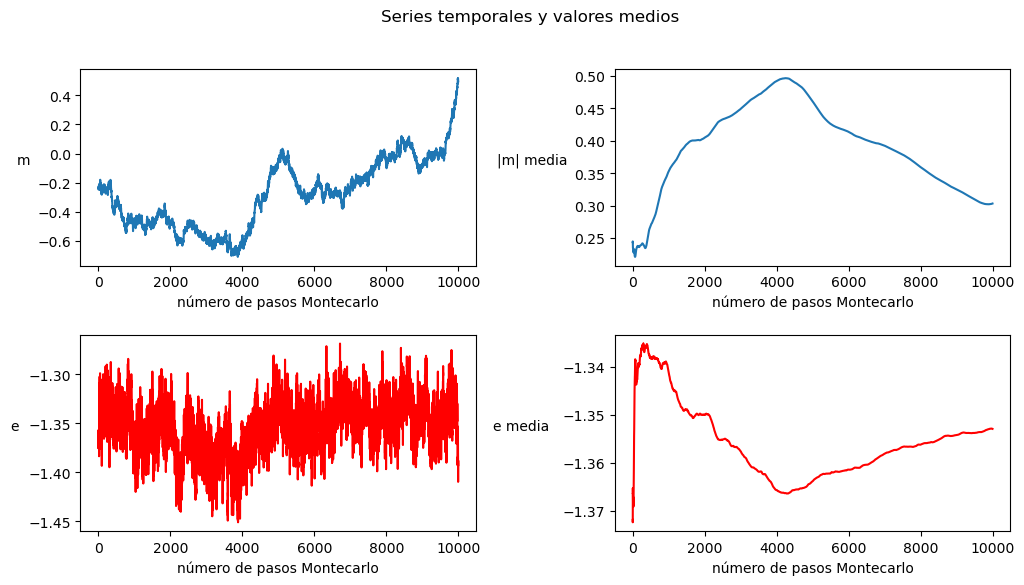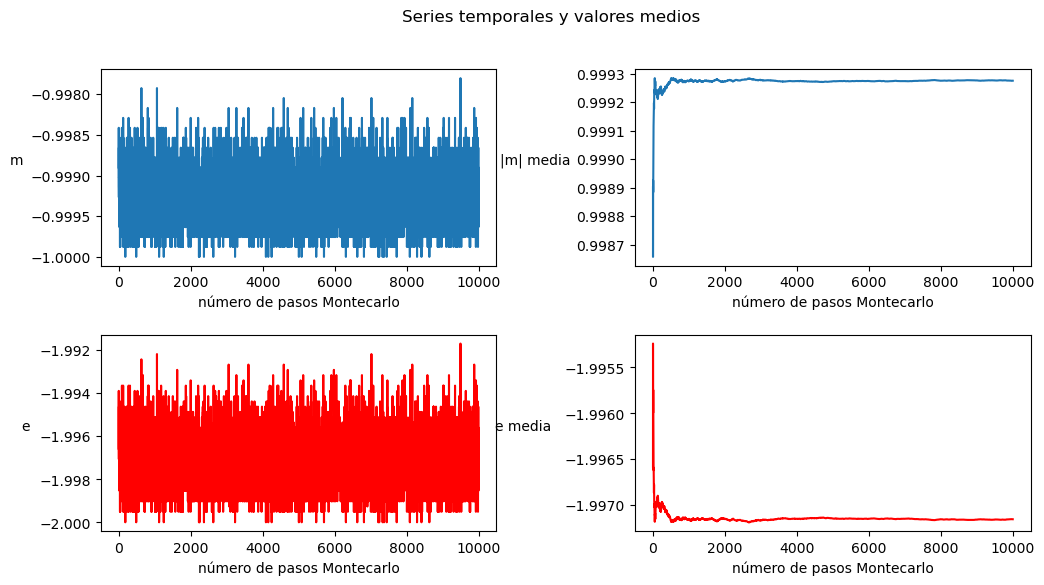

# **Transición de fase**
****

In [ ]:
L =  20                                                                       #Elijan L.
L2 = L * L

Tini = 2.2
Tfinal = 2.6
Tc = 2.269

# Rangos
deltaT_lejos = 5e-2
deltaT_cerca = 1e-2
ancho_cerca = 0.1
# Rango de temperaturas
T_baja = np.arange(Tini, Tc - ancho_cerca, deltaT_lejos)
T_fina = np.arange(Tc - ancho_cerca, Tc + ancho_cerca, deltaT_cerca)
T_alta = np.arange(Tc + ancho_cerca, Tfinal + deltaT_lejos, deltaT_lejos)

# Concatenar y eliminar duplicados (por seguridad)
temperaturas = np.unique(np.concatenate((T_baja, T_fina, T_alta)))

betas = 1 / temperaturas

factor = 1                                                                      #Este es un factor entero que permite controlar los números de pasos en su conjunto.
nequilibriolejos = 1000 * factor                                                   #Ajusten los valores. Aquí están puestos todos en 1.
npromediolejos = 10000 * factor
nequilibriocerca = 10000 * factor
npromediocerca= 50000 * factor


mmedia = []                                                                     #Crea listas para guardar las mediciones a cada temperatura.
emedia = []
chi = []
c = []

S = np.ones((L, L), dtype = int)                                                #Esta condición inicial asume que empiezan desde temperaturas bajas. Adáptenla de ser necesario.
#S = 2 * np.random.randint(2, size = (L, L)) - 1

for beta in tqdm(betas):
  prob = np.array([0,0,0,0,np.exp(-4*beta),0,0,0,np.exp(-8*beta)])                       #Modifiquen esto de acuerdo a cómo manejan la relación entre dE y la posición dentro del vector de probabilidades.

                                                                      #Ajusten según el valor al que se produce aproximadamente el máximo de la susceptibilidad. Tendrán que hacer algunas pruebas.

  if abs(1 / beta - Tc) < 0.2:                                              #Hay que mover el centro del intervalo de acuerdo a la posición del máximo para cada L.
    nequilibrio = nequilibriocerca                                              #Aquí se eligen los números de pasos de acuerdo a la cercanía al "centro". El valor '0.5' es tentativo.
    npromedio = npromediocerca                                                  #Si están interesados, pueden refinar el modo en el que se adapta el número de pasos de manera más minuciosa.
  else:
    nequilibrio = nequilibriolejos
    npromedio = npromediolejos

  S = metropolisTermo(S, prob, nequilibrio)                                     #Termaliza.

  S, m, e, varm, vare = metropolisN(S, prob, npromedio)                         #Mide el valor medio del valor absoluto de la magnetización, el valor medio de la energía,
                                                                                #la varianza del valor absoluto de la magnetización y de la energía.

  mmedia.append(m/L2)                                                     #Guarda la medición del valor absoluto de la magnetización por espín.
  emedia.append(e/L2)                                                     #Guarda la medición de la energía por espín.
  chi.append((varm/L2)*beta)                                                  #Completen estas funciones para calcular la susceptibilidad y el calor específico.
  c.append((vare/L2)*beta**2)


datos = [temperaturas,mmedia,emedia,chi,c]
datos = np.transpose(datos)

np.savetxt("Datos_red/datos_red_" + str(L)+".csv",datos,header="T,mmedia,emedia,chi,c",delimiter=",")

plt.figure(figsize=(9, 6))                                                      #Gráficos
plt.subplot(2, 2, 1)
plt.scatter(temperaturas,mmedia,marker='.')
plt.ylabel('magnetización')
plt.subplot(2, 2, 2)
plt.scatter(temperaturas,emedia,marker='.')
plt.ylabel('energia')
plt.xlabel('temperatura')
plt.subplot(2, 2, 3)
plt.scatter(temperaturas,chi,marker='.')
plt.ylabel('susceptibilidad')
plt.subplot(2, 2, 4)
plt.scatter(temperaturas,c,marker='.')
plt.ylabel('calor especifico')
plt.xlabel('temperatura')

#plt.savefig("Figuras transición/transición_L="+str(S.shape[0]) + ".png",bbox_inches ="tight")

Se puede observar que a temperaturas menores a la crítica todas las redes se alinean de manera tal que todos sus espines son +1 y a medida que la temperatura va aumentando los espines terminan llegando a un estado en el cual la mitad apuntan hacia un lado y la otra hacia el otro.

También se puede observar que para la susceptibilidad y para la capacidad todas las redes tienen un máximo en una temperatura $T_c$ cercana a la crítica de la red de Ising ($T \sim 2.269$). Se puede observar que a medida que crece el tamaño de la red esta $T_c$ se va acercando al valor real de la temperatura crítica para un ared de Ising infinita.

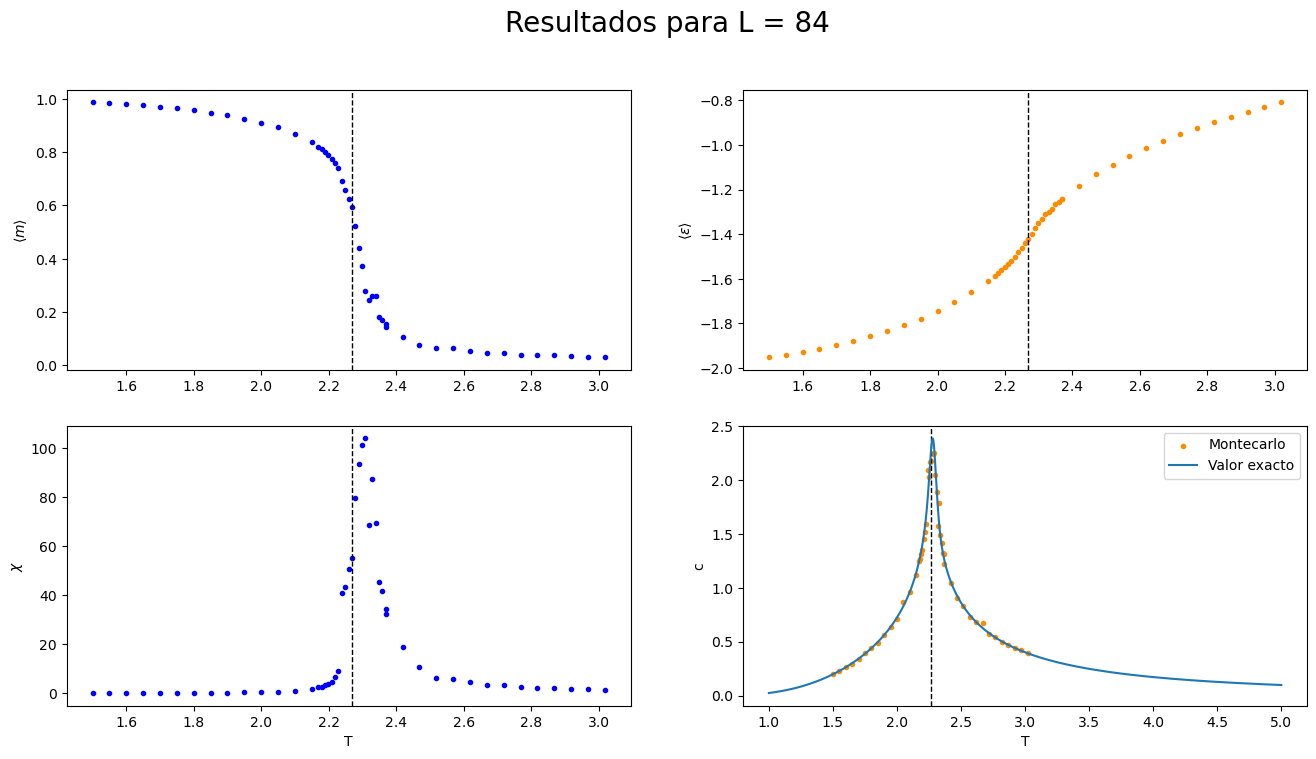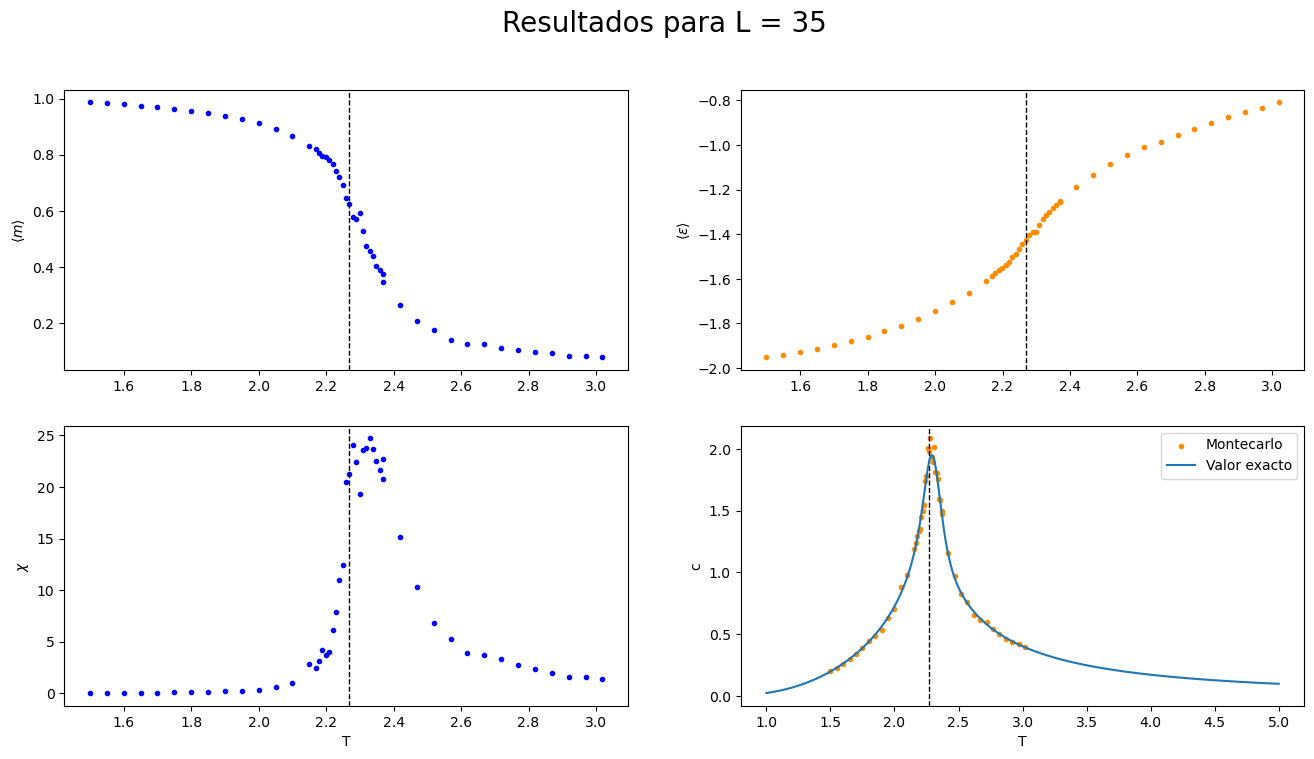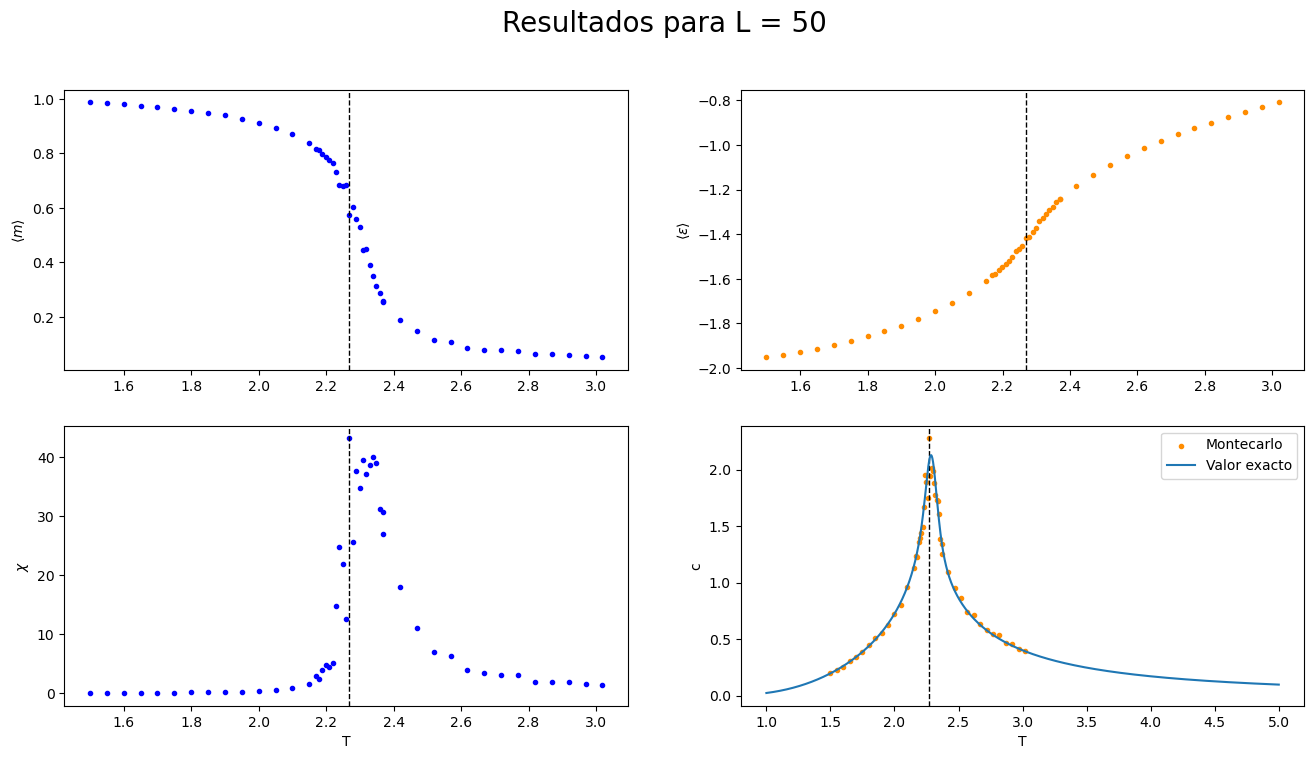

## RED CHI

In [ ]:
L =  50                                                                       #Elijan L.
L2 = L * L

Tini = 2.2
Tfinal = 2.5
Tc = 2.269

# Rangos
deltaT_lejos = 1e-2
deltaT_cerca = 5e-3
ancho_cerca = 0.1
# Rango de temperaturas
T_baja = np.arange(Tini, Tc - ancho_cerca, deltaT_lejos)
T_fina = np.arange(Tc - ancho_cerca, Tc + ancho_cerca, deltaT_cerca)
T_alta = np.arange(Tc + ancho_cerca, Tfinal + deltaT_lejos, deltaT_lejos)

# Concatenar y eliminar duplicados (por seguridad)
temperaturas = np.unique(np.concatenate((T_baja, T_fina, T_alta)))

betas = 1 / temperaturas

factor = 1                                                                      #Este es un factor entero que permite controlar los números de pasos en su conjunto.
nequilibriolejos = 1000 * factor                                                   #Ajusten los valores. Aquí están puestos todos en 1.
npromediolejos = 10000 * factor
nequilibriocerca = 10000 * factor
npromediocerca= 50000 * factor


mmedia = []                                                                     #Crea listas para guardar las mediciones a cada temperatura.
emedia = []
chi = []
c = []

S = np.ones((L, L), dtype = int)                                                #Esta condición inicial asume que empiezan desde temperaturas bajas. Adáptenla de ser necesario.
#S = 2 * np.random.randint(2, size = (L, L)) - 1

for beta in tqdm(betas):
  prob = np.array([0,0,0,0,np.exp(-4*beta),0,0,0,np.exp(-8*beta)])                       #Modifiquen esto de acuerdo a cómo manejan la relación entre dE y la posición dentro del vector de probabilidades.

                                                                      #Ajusten según el valor al que se produce aproximadamente el máximo de la susceptibilidad. Tendrán que hacer algunas pruebas.

  if abs(1 / beta - Tc) < 0.2:                                              #Hay que mover el centro del intervalo de acuerdo a la posición del máximo para cada L.
    nequilibrio = nequilibriocerca                                              #Aquí se eligen los números de pasos de acuerdo a la cercanía al "centro". El valor '0.5' es tentativo.
    npromedio = npromediocerca                                                  #Si están interesados, pueden refinar el modo en el que se adapta el número de pasos de manera más minuciosa.
  else:
    nequilibrio = nequilibriolejos
    npromedio = npromediolejos

  S = metropolisTermo(S, prob, nequilibrio)                                     #Termaliza.

  S, m, e, varm, vare = metropolisN(S, prob, npromedio)                         #Mide el valor medio del valor absoluto de la magnetización, el valor medio de la energía,
                                                                                #la varianza del valor absoluto de la magnetización y de la energía.

  mmedia.append(m/L2)                                                     #Guarda la medición del valor absoluto de la magnetización por espín.
  emedia.append(e/L2)                                                     #Guarda la medición de la energía por espín.
  chi.append((varm/L2)*beta)                                                  #Completen estas funciones para calcular la susceptibilidad y el calor específico.
  c.append((vare/L2)*beta**2)


datos = [temperaturas,mmedia,emedia,chi,c]
datos = np.transpose(datos)

np.savetxt("datos_red_chi" + str(L)+".csv",datos,header="T,mmedia,emedia,chi,c",delimiter=",")

plt.figure(figsize=(9, 6))                                                      #Gráficos
plt.subplot(2, 2, 1)
plt.scatter(temperaturas,mmedia,marker='.')
plt.ylabel('magnetización')
plt.subplot(2, 2, 2)
plt.scatter(temperaturas,emedia,marker='.')
plt.ylabel('energia')
plt.xlabel('temperatura')
plt.subplot(2, 2, 3)
plt.scatter(temperaturas,chi,marker='.')
plt.ylabel('susceptibilidad')
plt.subplot(2, 2, 4)
plt.scatter(temperaturas,c,marker='.')
plt.ylabel('calor especifico')
plt.xlabel('temperatura')

#plt.savefig("Figuras transición/transición_L="+str(S.shape[0]) + ".png",bbox_inches ="tight")

# **Temperatura crítica**
****

Según la teoría de *finite-size scaling*, para una red de Ising bidimensional de lado $L$, el pico de la susceptibilidad ocurre a una temperatura $T_\textrm{c}(L)$ dada por
$$T_\textrm{c}(L)=T_\textrm{c}+\frac{a}{L},$$
donde $T_\textrm{c}$ es la temperatura crítica del sistema en el límite termodinámico y $a$ es una constante.

Realizamos pasos Montecarlo cerca de la temperatura crítica para distintos tamaños de red e hicimos un ajuste parabólico. Tomamos como $T_c(L)$ a la temperatura a la cual el ajuste era máximo.

Realizamos un ajuste lineal de las temperaturas críticas en función de la inversa de $L$. La ordenada al origen es la temperatura crítica de la red.  

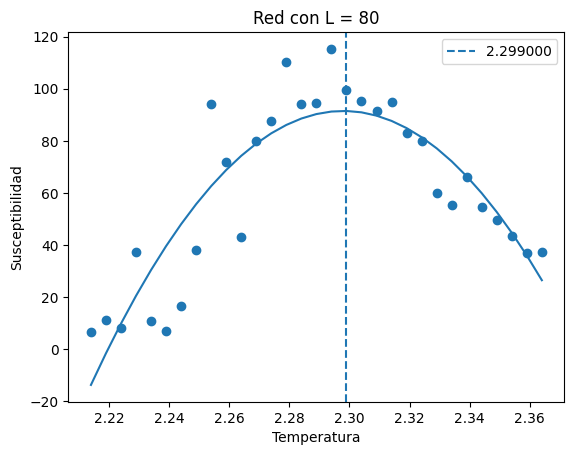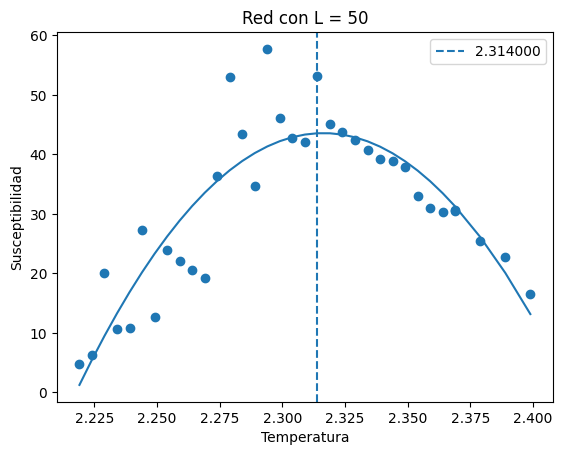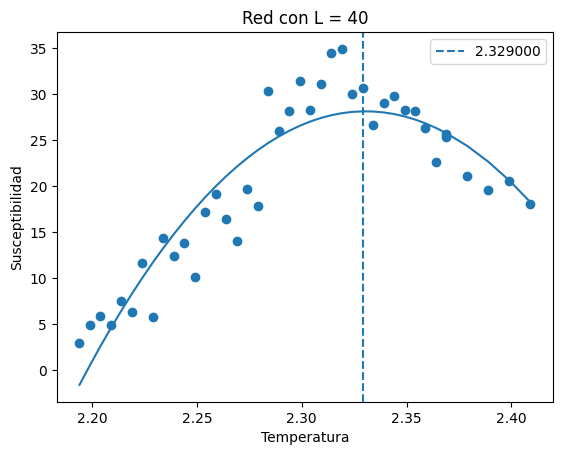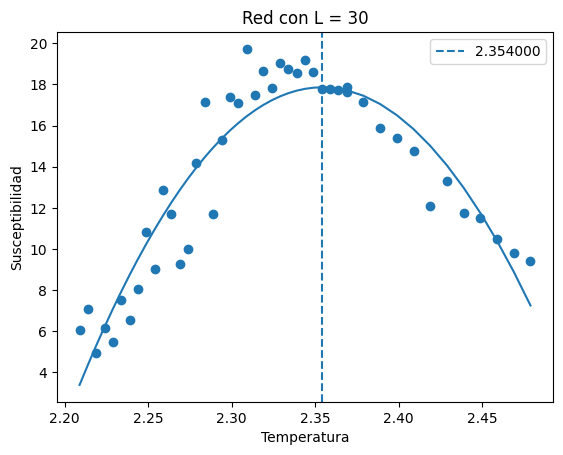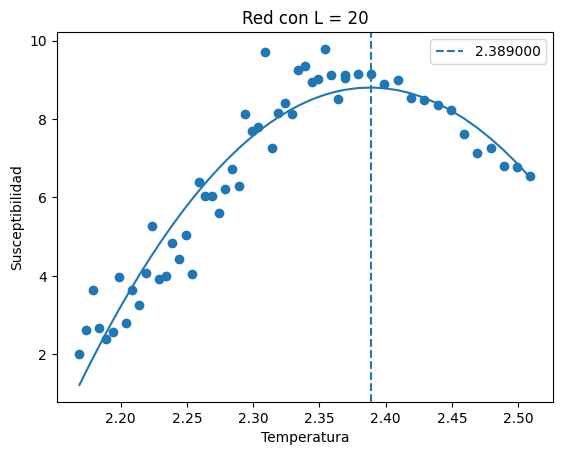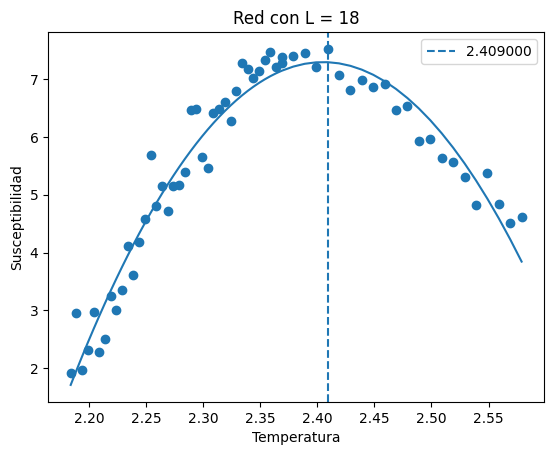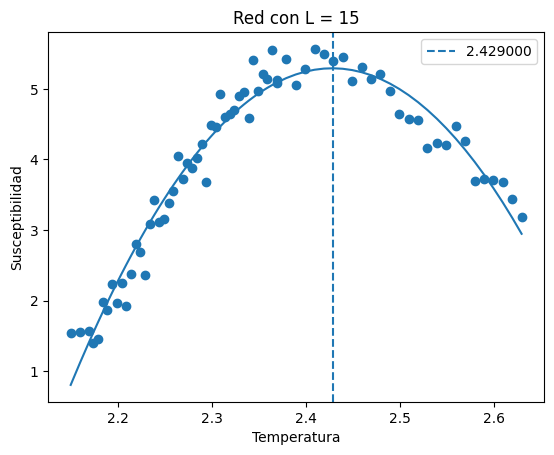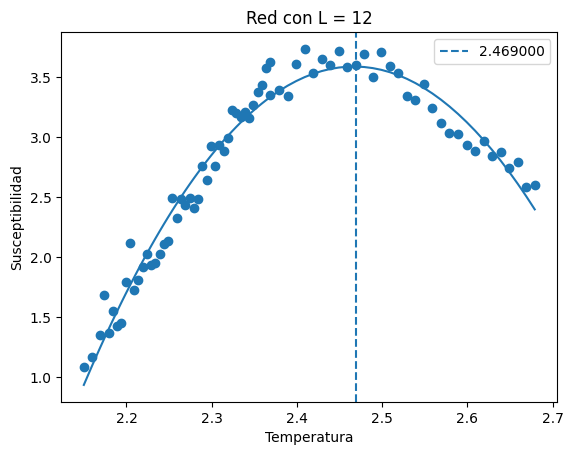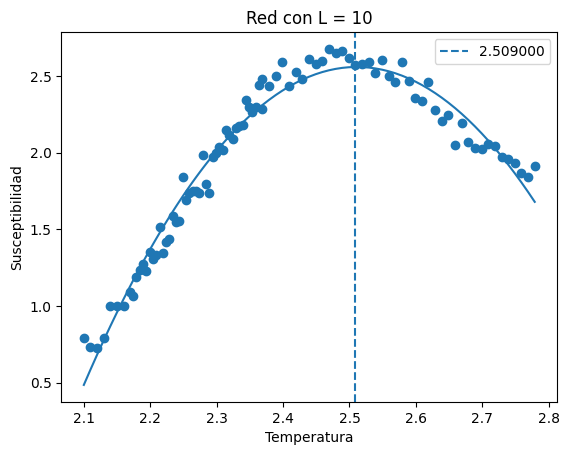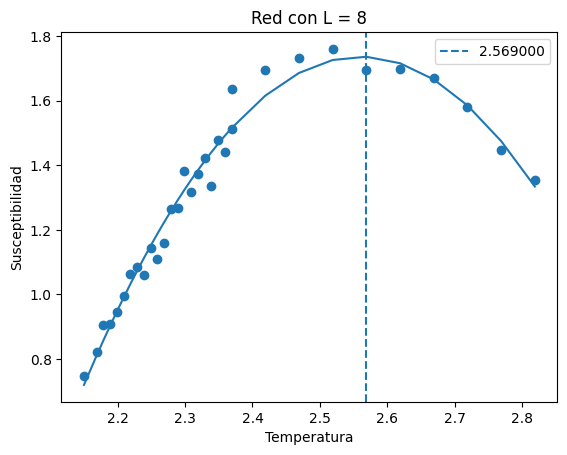

Repetimos varias veces algunas redes para confirmar el valor de $T_c(L)$.

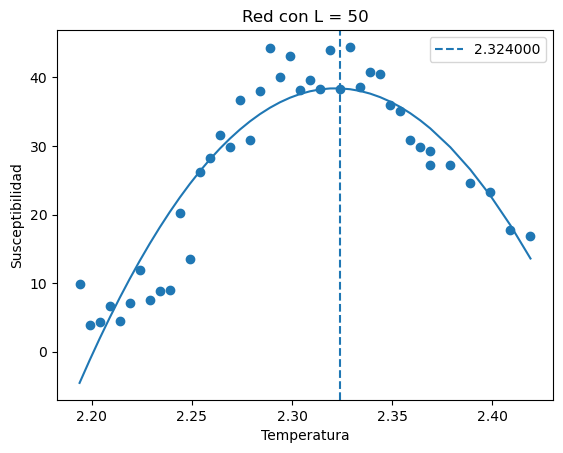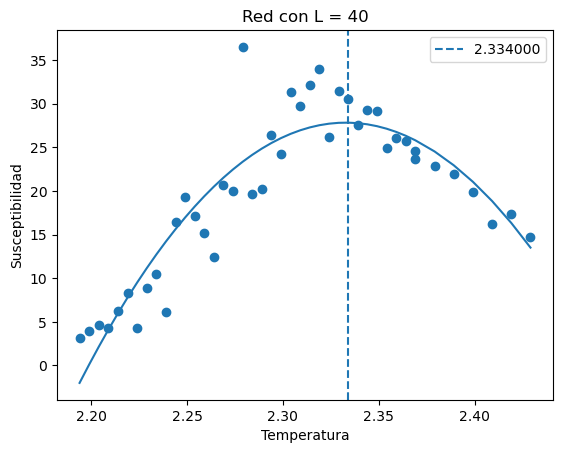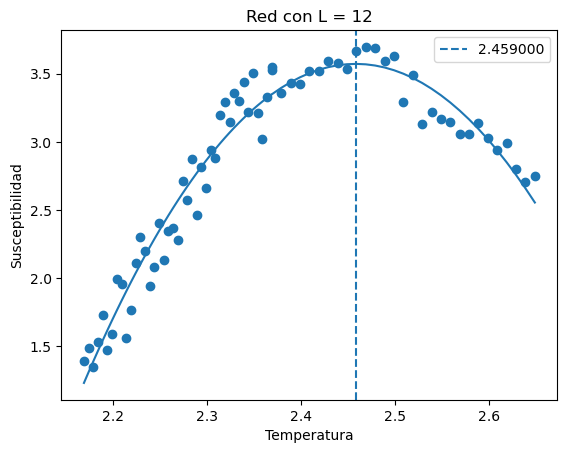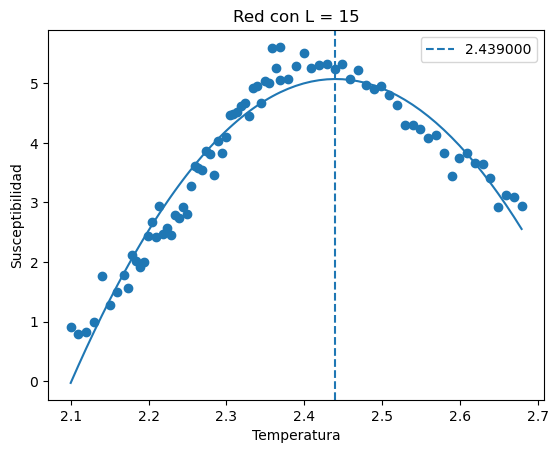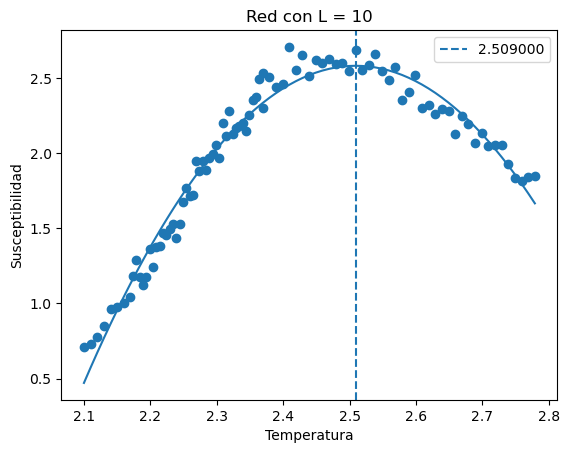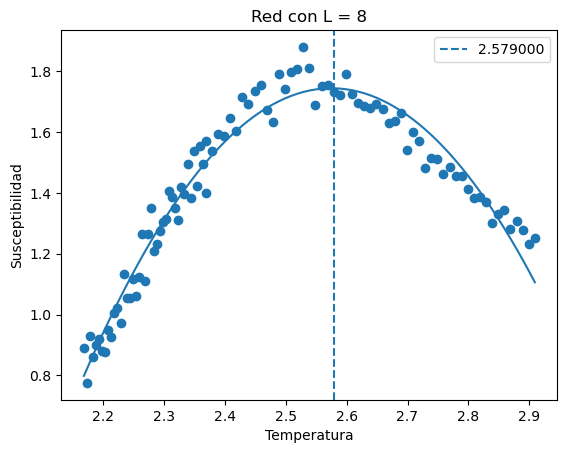

In [ ]:
def cuadratica(x,a,b,c):
    return a*x**2 + b*x + c

def lineal(x,m,b):
    return m*x + b

directory = r"Directorio de los datos" #CAMBIAR EL DIRECTORIO

T_c_L = []
T_c_L_sigma =[]
L_inv = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    datos = np.loadtxt("Datos_red_chi//"+str(filename),delimiter=",")
    temp = datos[:,0]
    chi = datos[:,1]
    a = filename.removeprefix("datos_red_chi")
    b = a.removesuffix(".csv")
    popt,pcov = curve_fit(cuadratica,temp,chi)
    max = -popt[1]/(2*popt[0])
    sigma = np.sqrt(
    ((popt[1]/(2*popt[0]**2))**2)*pcov[0,0] +
    ((1/(2*popt[0]))**2)*pcov[1, 1] -
    2*(popt[1]/(2*popt[0]**2))*(1/(2*popt[0]))*pcov[0,1]
    ) #Propagación de error
    T_c_L.append(max)
    T_c_L_sigma.append(sigma)
    L_inv.append(1/int(b))

popt,pcov = curve_fit(lineal,L_inv,T_c_L,sigma=T_c_L_sigma)
plt.errorbar(L_inv, T_c_L, yerr=T_c_L_sigma, fmt='o')
plt.plot(L_inv,lineal(np.array(L_inv),*popt),color="orange",label=r"$T_c = $ %s $\pm$ %s"%(round(popt[1],5),round(pcov[1,1],5)))
plt.xlabel("1/L")
plt.ylabel(r"$T_c$")
plt.legend()
plt.grid()

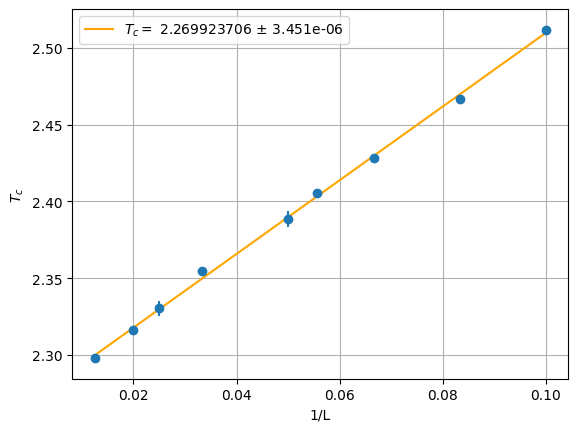

Con los valores de $T_c(L)$ repetidos (varias veces un mismo tamaño de red) graficamos para ver si hay diferencias entre las distintas realizaciones. En el siguiente gráfico se puede observar que hay algunos valores de $L$ repetidos por lo que se acaba de mencionar.

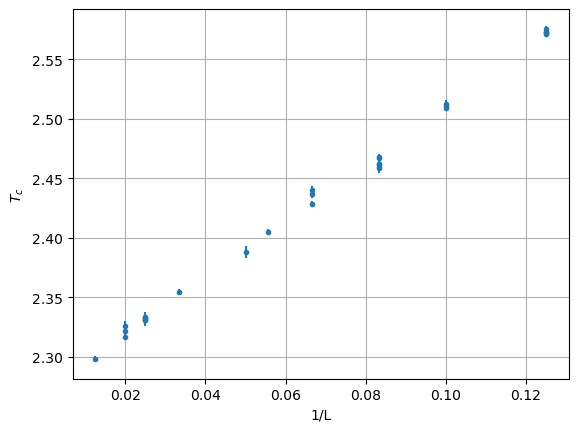